In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ash2703/handsignimages

Dataset URL: https://www.kaggle.com/datasets/ash2703/handsignimages
License(s): DbCL-1.0
 95% 22.0M/23.1M [00:00<00:00, 119MB/s] 
100% 23.1M/23.1M [00:00<00:00, 117MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/handsignimages.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.
Class labels: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 13, 'P': 14, 'Q': 15, 'R': 16, 'S': 17, 'T': 18, 'U': 19, 'V': 20, 'W': 21, 'X': 22, 'Y': 23}


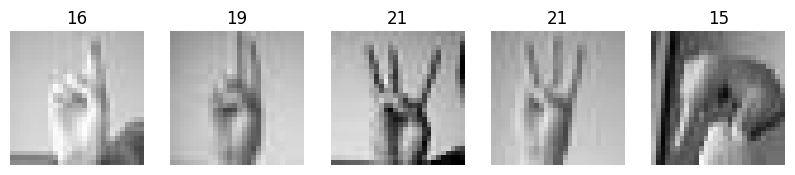

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define paths
dataset_path = '/content/Train'
image_size = (28, 28)
batch_size = 32

# Create an ImageDataGenerator instance for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    validation_split=0.2  # Use 20% of the data for validation
)

# Load training data
train_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification
    subset='training'  # Use subset for training data
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification
    subset='validation'  # Use subset for validation data
)

# Check the class labels
class_labels = train_generator.class_indices
print("Class labels:", class_labels)

# Function to display some images
def display_images(generator, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        img, label = next(generator)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img[0])
        plt.title(np.argmax(label[0]))
        plt.axis('off')
    plt.show()

# Display some training images
display_images(train_generator)

In [ ]:
for images, labels in train_generator:
  print(images.shape)
  print(labels.shape)
  break

(32, 28, 28, 3)
(32, 24)


In [ ]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(24, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs = 10, validation_data = validation_generator)

Epoch 1/10
687/687 [==============================] - 54s 75ms/step - loss: 0.3879 - accuracy: 0.9107 - val_loss: 0.0417 - val_accuracy: 0.9998
Epoch 2/10
687/687 [==============================] - 44s 63ms/step - loss: 0.0139 - accuracy: 0.9997 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 3/10
687/687 [==============================] - 44s 63ms/step - loss: 0.0059 - accuracy: 0.9999 - val_loss: 0.0062 - val_accuracy: 0.9998
Epoch 4/10
687/687 [==============================] - 44s 64ms/step - loss: 0.0315 - accuracy: 0.9927 - val_loss: 0.0031 - val_accuracy: 0.9996
Epoch 5/10
687/687 [==============================] - 43s 63ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 3.6675e-04 - val_accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 43s 63ms/step - loss: 8.4450e-04 - accuracy: 1.0000 - val_loss: 8.6057e-05 - val_accuracy: 1.0000
Epoch 7/10
687/687 [==============================] - 49s 71ms/step - loss: 5.0859e-04 - accuracy: 1.0000 - val_loss: 4.4715

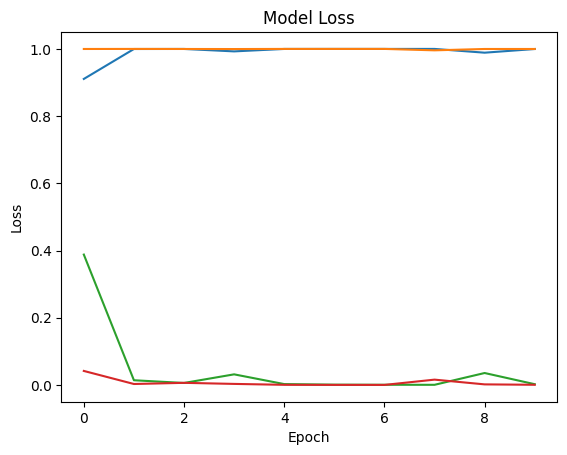

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

**Testing on the test data set**

In [ ]:
test_data_path = '/content/Test'

test_datagen = ImageDataGenerator(rescale = 1./255)

# load the test data
test_generator = test_datagen.flow_from_directory(
    directory = test_data_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical', # for multiclass classification
    shuffle = False # to maintain the order of the images
)

Found 7172 images belonging to 24 classes.


In [ ]:
# evaluwate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

225/225 [==============================] - 9s 37ms/step - loss: 0.2257 - accuracy: 0.9477
0.22573229670524597
0.947713315486908


In [ ]:
# generate predictions
predictions = model.predict(test_generator, verbose = 1)

# get the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# convert predictions to class labels
predicted_labels = np.argmax(predictions, axis = 1)
true_classes = test_generator.classes
class_lables = test_generator.classes

from tensorflow.math import confusion_matrix
cm = confusion_matrix(true_classes, predicted_labels)
print(cm)

225/225 [==============================] - 6s 24ms/step
tf.Tensor(
[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 428   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   4   0   0]
 [  0   0 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 496   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 312   6   8   0   0   0   0   0   4   2   0   0
   16   0   0   0   0   0]
 [  0   0   0   0   0   0   4 432   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 288   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   

In [ ]:
img_path = input('Enter image path: ')

img = cv2.imread(img_path)

cv2_imshow(img)

img_resized = cv2.resize(img, (28, 28))

img_normalize = img_resized/255.0

img_reshaped = np.reshape(img_normalize, (1, 28, 28, 3))

prediction = model.predict(img_reshaped)

predict_class = np.argmax(prediction)


class_labels = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'
}

predicted_label = class_labels.get(predict_class, 'unknow')
print(f'Predicted class is: {predicted_label}')

Enter image path: /content/Test/A/1003_A.jpg


1/1 [==============================] - 0s 25ms/step
Predicted class is: A
